In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix # multilable for >>> Multiclass Classification
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
import warnings # To avoid warning message...Which is shown bcz of New Upate of Python
warnings.filterwarnings("ignore")


In [9]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
## EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# feature selection

x = df.drop("target",axis=1)
y = df['target']

In [13]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42)


In [15]:
##Model Building
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)




LogisticRegression()

In [16]:
## Evaluation

y_pred = lr_clf.predict(x_test)
y_pred[20:25] # Y predicted
y_test[20:25] # y actual


152    1
269    0
272    0
25     1
146    1
Name: target, dtype: int64

In [17]:
clf_report = classification_report(y_test,y_pred)
print("classification_report is :\n",clf_report)

classification_report is :
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.86      0.93      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [18]:
y_pred_prob = lr_clf.predict_proba(x_test)
y_pred_prob


array([[8.88093121e-01, 1.11906879e-01],
       [2.14594411e-01, 7.85405589e-01],
       [1.71535898e-01, 8.28464102e-01],
       [9.74435621e-01, 2.55643785e-02],
       [7.65384444e-02, 9.23461556e-01],
       [7.73266772e-02, 9.22673323e-01],
       [4.51106415e-01, 5.48893585e-01],
       [9.98630844e-01, 1.36915633e-03],
       [9.94353488e-01, 5.64651232e-03],
       [4.88501248e-01, 5.11498752e-01],
       [2.03440858e-01, 7.96559142e-01],
       [9.07411082e-01, 9.25889178e-02],
       [6.88605742e-02, 9.31139426e-01],
       [9.76855607e-01, 2.31443931e-02],
       [1.75975643e-02, 9.82402436e-01],
       [5.24817758e-02, 9.47518224e-01],
       [2.16741665e-02, 9.78325833e-01],
       [9.34126150e-01, 6.58738502e-02],
       [9.91287864e-01, 8.71213588e-03],
       [9.88237573e-01, 1.17624269e-02],
       [2.61501356e-01, 7.38498644e-01],
       [9.89847227e-01, 1.01527730e-02],
       [8.21407898e-01, 1.78592102e-01],
       [1.76599050e-01, 8.23400950e-01],
       [7.284212

In [19]:
y_pred[-5:]

array([1, 1, 1, 0, 1])

In [20]:
y_pred_prob[:,1]

array([1.11906879e-01, 7.85405589e-01, 8.28464102e-01, 2.55643785e-02,
       9.23461556e-01, 9.22673323e-01, 5.48893585e-01, 1.36915633e-03,
       5.64651232e-03, 5.11498752e-01, 7.96559142e-01, 9.25889178e-02,
       9.31139426e-01, 2.31443931e-02, 9.82402436e-01, 9.47518224e-01,
       9.78325833e-01, 6.58738502e-02, 8.71213588e-03, 1.17624269e-02,
       7.38498644e-01, 1.01527730e-02, 1.78592102e-01, 8.23400950e-01,
       9.27157879e-01, 6.87975859e-01, 9.14871704e-01, 6.29069940e-01,
       7.07250736e-03, 8.94153844e-01, 4.88503346e-02, 3.12361475e-02,
       7.67345195e-03, 7.18468081e-02, 7.59117395e-01, 6.68549609e-02,
       6.34514281e-01, 8.81922684e-01, 8.41032804e-01, 8.23660748e-01,
       5.61353441e-01, 8.39155848e-01, 7.97226722e-01, 6.87456332e-01,
       8.53653676e-01, 4.83677820e-03, 7.91071339e-01, 9.52014720e-01,
       7.08089486e-02, 2.87407961e-02, 5.61557398e-02, 1.13117528e-02,
       8.82365605e-01, 9.79171318e-01, 2.02692200e-01, 8.21508554e-04,
      

In [21]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_prob[:,1])

In [22]:
thresh


array([1.98240244e+00, 9.82402436e-01, 9.66864622e-01, 9.58994945e-01,
       9.20407913e-01, 9.14871704e-01, 7.96559142e-01, 7.85405589e-01,
       7.38498644e-01, 6.87975859e-01, 5.11498752e-01, 1.11906879e-01,
       9.25889178e-02, 9.08008790e-02, 7.18468081e-02, 5.61557398e-02,
       4.88503346e-02, 8.21508554e-04])

Text(0, 0.5, 'True Positive Rate')

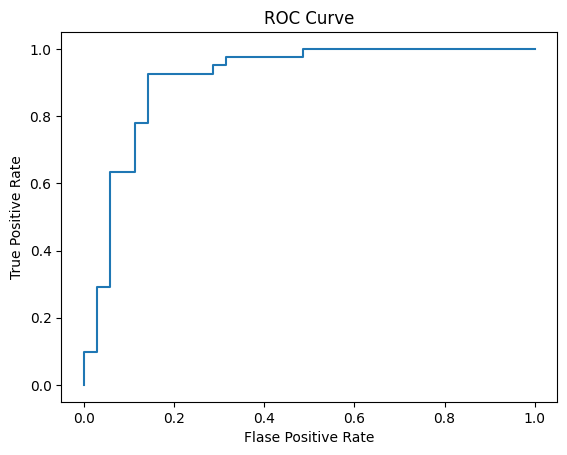

In [23]:
## ROC Curve

plt.title("ROC Curve")
plt.plot(fpr,tpr)
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
